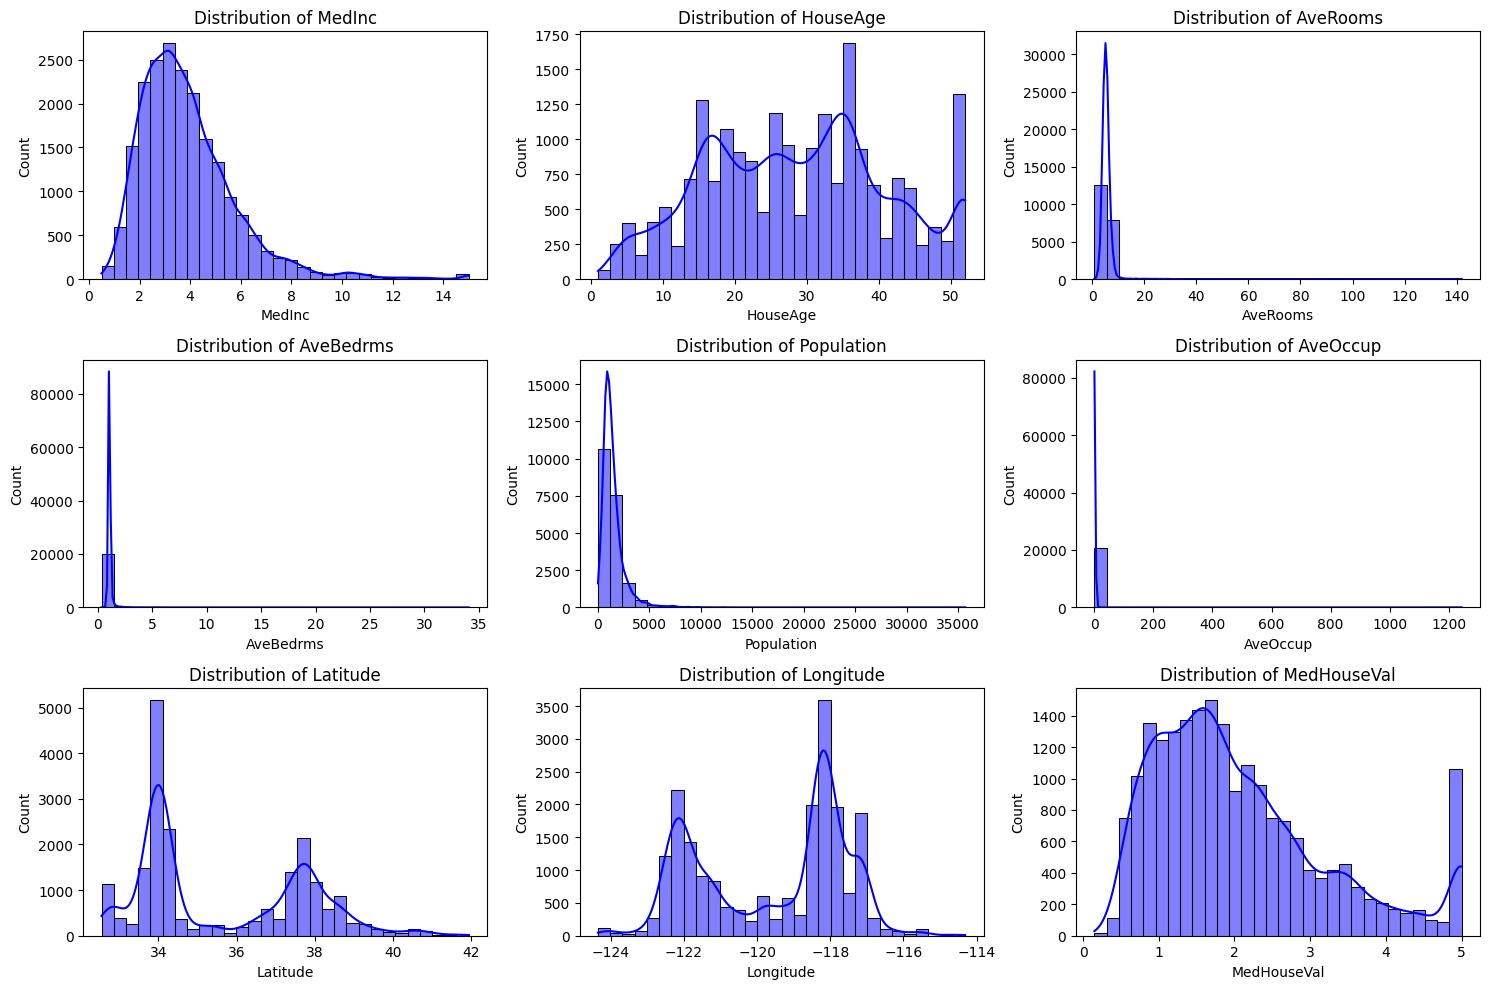

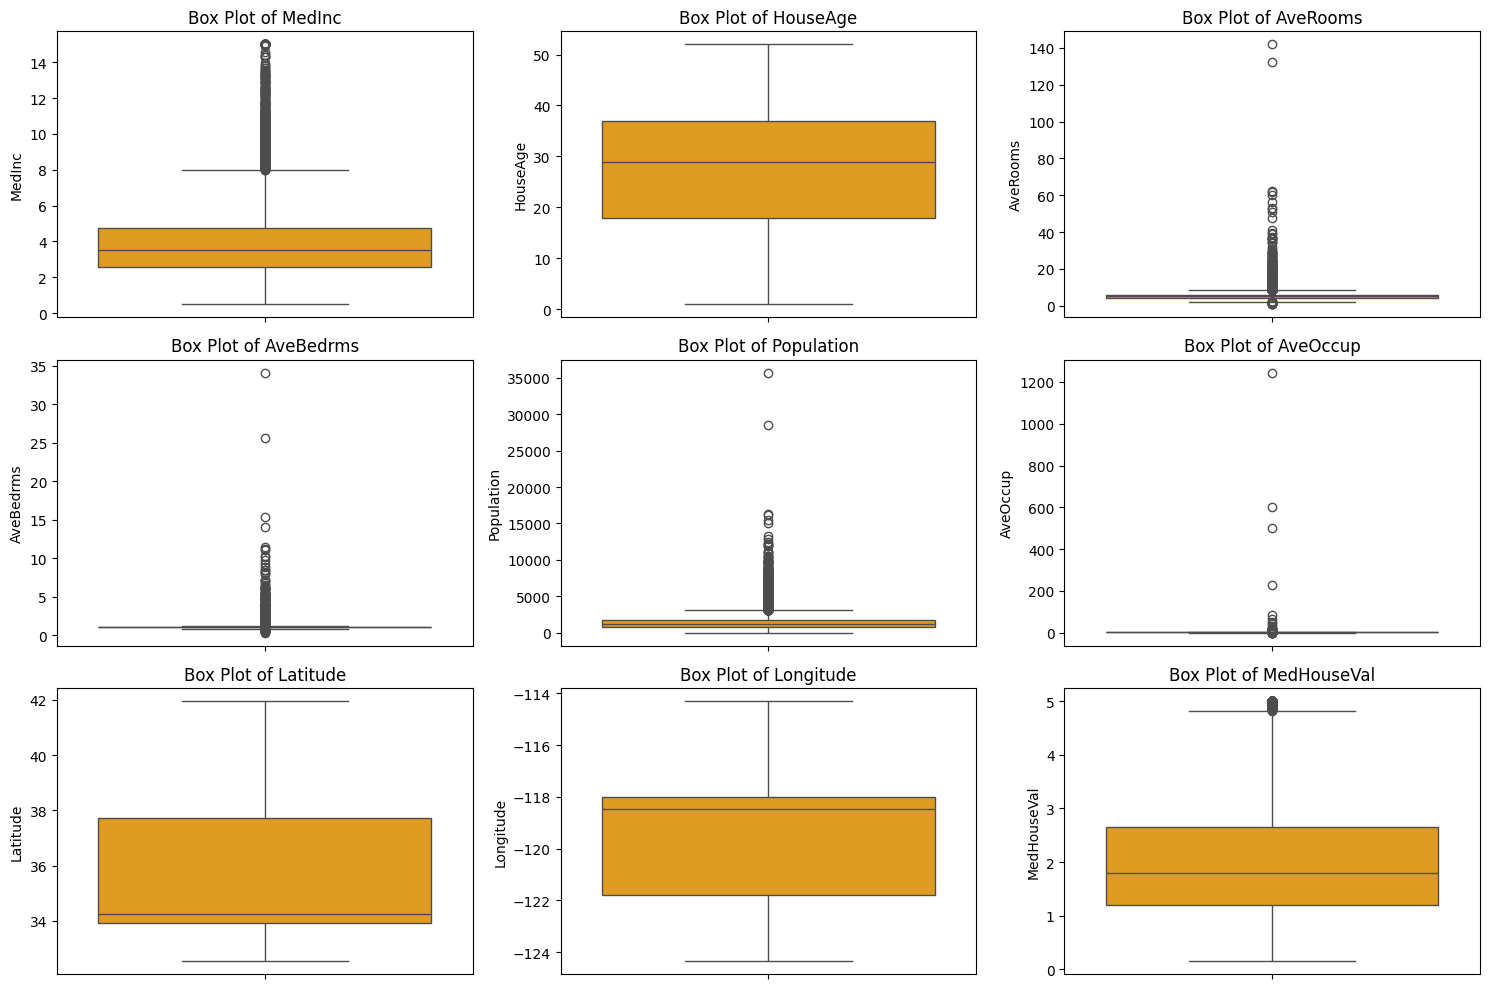

Outliers Detection:
MedInc: 681 outliers
HouseAge: 0 outliers
AveRooms: 511 outliers
AveBedrms: 1424 outliers
Population: 1196 outliers
AveOccup: 711 outliers
Latitude: 0 outliers
Longitude: 0 outliers
MedHouseVal: 1071 outliers

Dataset Summary:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Lon

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing

# Load the California Housing dataset
data = fetch_california_housing(as_frame = True)
housing_df = data.frame

# Select numerical features for analysis
numerical_features = housing_df.select_dtypes(include = [np.number]).columns

# Plot histograms for numerical features
plt.figure(figsize = (15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(housing_df[feature], kde = True, bins = 30, color = 'blue')
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Plot box plots for numerical features
plt.figure(figsize = (15, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(housing_df[feature], color = 'orange')
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()

# Detect outliers using the IQR method
print("Outliers Detection:")
outliers_summary = {}
for feature in numerical_features:
    Q1 = housing_df[feature].quantile(0.25)
    Q3 = housing_df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = housing_df[(housing_df[feature] < lower_bound) | (housing_df[feature] > upper_bound)]
    outliers_summary[feature] = len(outliers)
    print(f"{feature}: {len(outliers)} outliers")

# Print a summary of the dataset
print("\nDataset Summary:")
print(housing_df.describe())